---
---

# **`CASE STUDY - 2` :: Apple Foliar Disease Detection**  🍎🌳🍏
![img_1](E:\STUDY\PROJECTS\AAIC_Case_Study_2\Blog_and_Doc_Images\Apple_img_2.png)


---
---


## **`PROJECT Documents` 💼**
#### ✅ **`Business Deck`**
- This deck is created for explaining the argicultural aspects, open issues, farmers concerns, economic loss and other aspects related to this problem. [🏷️](https://docs.google.com/presentation/d/1mk-jUTnGU4U-fDGsECNzRqugVOIiTmjjbnlrbkxAzuE/)

## **`DATASETS Used` 🍃**
- Plant Pathology 2020 - FGVC7 [🏷️](https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/overview)

## **`NOTEBOOK Description` 📗**

**This notebook contains the below improvements done on the best performing model to achieve better results:**
    
- `Hyper-parameterized` best performing model (**DenseNet-121 -- Adam -- 0.0005**)
    - How the model is behaving on unseen images and explaining its predictions?
    

- `Improvement - 1`
    - Using `Focal Loss` in-place of Cross Entropy to deal with the class imbalance problem
    - Using `Label Smoothing` to reduce the chances of overfitting of the model
    

- `Improvement - 2`
    - Using the above model as a `CNN feature extractor` then `training the ML models` on DL based features to yield better results

## **`NOTEBOOK Contents` ✍️**

[1. Libraries Import](#Import_Libraries)

### ⭐ **`Improvements done on best Performing Model`**

- ⚙️ [Data Loading](#Data_Loading)

- ⚙️ [Calculating Class Weights](#Calculating_Class_Weights)

- 💡 [Defining Performance Metrics](#Defining_Performance_Metrics)

- 🧮 [Model Configuration](#Model_Configuration)

- ⚗️[Best Model](#Best_Model)
    - 🧮[Improvement 1](#Improvement_1)
    
    - 🧮[Improvement 2](#Improvement_2)


- [OVERALL RESULTS](#OVERALL_RESULTS)

## **`Import_Libraries`**

In [1]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 


In [2]:
!pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 


In [3]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from IPython.display import display
from sklearn.utils import class_weight
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
ticks_font_dict = {'family':'sans-serif','size':11,'color':'black','style':'italic'}
title_font_dict = {'family':'sans-serif','size':17.5,'color':'Blue','style':'italic'}

## **`Data_Loading`**

In [5]:
import random as rn
import datetime
import time
import pathlib
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation, Flatten, Conv1D, Conv2D, Concatenate, Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import MaxPool1D, MaxPool2D, GlobalAveragePooling1D, GlobalAveragePooling2D, AveragePooling1D, AveragePooling2D, SpatialDropout2D
from keras.regularizers import l1, l2
from keras.preprocessing import image
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from tensorboard import notebook
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json

In [6]:
# Downloading the X_train, y_train, X_test, y_test files
!gdown 13rK96P8FE9OBbm2ckVkRW46LbXUT4KWl
!gdown 1WLumZ9OH5ZivlnDYB1niWc691mWhYQnB
!gdown 1nP8_94jbhV-_QBHSsZ9tOapV0WhFl7bd
!gdown 15dNrBXpZGcmkBWuOSV-JhR-j2d87kXtt

# Downloading weights of BEST MODEL & Model JSON file
!gdown 1zT56juJ7lYLrpV5gkCz3peeYeSgbRdai
!gdown 1-SzFlvim2ShSm0ispV1zBRLhwAftTgf_

Downloading...
From: https://drive.google.com/uc?id=13rK96P8FE9OBbm2ckVkRW46LbXUT4KWl
To: /content/X_test.npz
100% 440M/440M [00:04<00:00, 97.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WLumZ9OH5ZivlnDYB1niWc691mWhYQnB
To: /content/y_test.npz
100% 6.10k/6.10k [00:00<00:00, 7.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nP8_94jbhV-_QBHSsZ9tOapV0WhFl7bd
To: /content/y_train.npz
100% 178k/178k [00:00<00:00, 52.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15dNrBXpZGcmkBWuOSV-JhR-j2d87kXtt
To: /content/X_train.npz
100% 6.71G/6.71G [01:13<00:00, 90.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zT56juJ7lYLrpV5gkCz3peeYeSgbRdai
To: /content/weights-14-0.0253.hdf5
100% 87.9M/87.9M [00:01<00:00, 58.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-SzFlvim2ShSm0ispV1zBRLhwAftTgf_
To: /content/DenseNet_Model.json
100% 203k/203k [00:00<00:00, 95.1MB/s]


In [7]:
# Downloading the weights of BEST MODEL Confg + FOCAL LOSS + Label Smoothing
!gdown 1HdgMwjlEtLnDL2s6Mi7op6HX-uWOFUC9

Downloading...
From: https://drive.google.com/uc?id=1HdgMwjlEtLnDL2s6Mi7op6HX-uWOFUC9
To: /content/weights-09-0.0277.hdf5
100% 87.9M/87.9M [00:00<00:00, 230MB/s]


In [8]:
# Loading the X_train, y_train, X_test & y_test files in memory
x_train_file = np.load("X_train.npz")
X_train = x_train_file.f.arr_0

y_train_file = np.load("y_train.npz")
y_train = y_train_file.f.arr_0

x_test_file = np.load("X_test.npz")
X_test = x_test_file.f.arr_0

y_test_file = np.load("y_test.npz")
y_test = y_test_file.f.arr_0

In [9]:
# Saving the memory;
del x_train_file;
del y_train_file;
del x_test_file;
del y_test_file;

In [10]:
# Checking types of TRAIN, VAL & TEST sets
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [11]:
# Checking shapes of TRAIN, VAL & TEST sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11138, 224, 224, 3), (11138, 4), (365, 224, 224, 3), (365, 4))

## **`Calculating_Class_Weights`**
- **Using the class weights we will be able to solve the problem of class-imbalance.**

In [12]:
y_train.shape

(11138, 4)

In [13]:
cols = ['Healthy', 'Multiple_Diseases', 'Rust', 'Scab']
tmp_cw = pd.DataFrame(y_train, columns=cols)
tmp_cw

Healthy  Multiple_Diseases  Rust  Scab
0          0.0                0.0   0.0   1.0
1          0.0                0.0   1.0   0.0
2          0.0                0.0   0.0   1.0
3          0.0                0.0   1.0   0.0
4          0.0                0.0   0.0   1.0
...        ...                ...   ...   ...
11133      1.0                0.0   0.0   0.0
11134      1.0                0.0   0.0   0.0
11135      1.0                0.0   0.0   0.0
11136      0.0                0.0   0.0   1.0
11137      1.0                0.0   0.0   0.0

[11138 rows x 4 columns]

In [14]:
def class_label(hl, md, rs, sc):
  """
  Description : This function is created for assigning the class label tag.
  """
  if hl == 1:
    return 0
  elif md == 1:
    return 1
  elif rs == 1:
    return 2
  elif sc == 1:
    return 3

In [15]:
tmp_cw['label'] = tmp_cw[['Healthy', 'Multiple_Diseases', 'Rust', 'Scab']].apply(lambda row: class_label(row['Healthy'], 
                                                                                                   row['Multiple_Diseases'],
                                                                                                   row['Rust'],
                                                                                                   row['Scab']), axis=1)

In [16]:
np.unique(tmp_cw['label'].values)

array([0, 1, 2, 3])

In [17]:
# Calculating the class weights
cw1 = class_weight.compute_class_weight('balanced', classes = np.unique(tmp_cw['label'].values), y=tmp_cw['label'].values)
cw1

array([0.88621897, 4.95462633, 0.72816423, 0.77132964])

In [18]:
# Storing the weights as a dict
cw1_dict = {0:cw1[0], 1:cw1[1], 2:cw1[2], 3:cw1[3]}
cw1_dict

{0: 0.8862189688096753,
 1: 4.954626334519573,
 2: 0.7281642259414226,
 3: 0.7713296398891967}

## **`Defining_Performance_Metrics`**

In [19]:
# Declaring the metrics
tfa_f1_scr = tfa.metrics.F1Score(num_classes=4, average='macro')

In [20]:
# Defining the AUC Score method
def auc_score(y_true, y_pred):
    """
    Description : This function is created for returning ROC AUC Score.
    """
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

# Calculating the AUC score
def auc(y_true, y_pred):
    """
    Description : This function is created for defining the ROC AUC function as a TF function for graph computation.
    """
    score = tf.py_function(auc_score, [y_true, y_pred], 'float32', name='sklearnAUC')
    return score

In [21]:
cols = ['Healthy', 'Multiple_Diseases', 'Rust', 'Scab'];

In [22]:
# Generating the multi-class confusion matrix for seeing the classification results
def confusion_matrix_(actual_labels, dataset, model, BATCH_SIZE=32):
    """
    Description : This function is created for generating the confusion matrix for all the tgt classes.
    """
    # Model predictions
    y_pred = model.predict(dataset, batch_size=BATCH_SIZE)
  
    # Storing the predictions in the form of 0 or 1
    for i in range(y_pred.shape[0]):
        y_pred[i] = np.where(y_pred[i] == y_pred[i].max(), 1, 0)

    # Storing the actual labels for all tgt classes
    actual_healthy = np.choose([0], actual_labels.T)
    actual_multiple_diseases = np.choose([1], actual_labels.T)
    actual_rust = np.choose([2], actual_labels.T)
    actual_scab = np.choose([3], actual_labels.T)
  
    # Storing the predicted labels for all tgt classes
    predicted_healthy = np.choose([0], y_pred.T)
    predicted_multiple_diseases = np.choose([1], y_pred.T)
    predicted_rust = np.choose([2], y_pred.T)
    predicted_scab = np.choose([3], y_pred.T)
    
    # Generating the perf metrics score
    ## Accuracy
    calc_acc = tf.keras.metrics.BinaryAccuracy()
    calc_acc.update_state(actual_healthy, predicted_healthy)
    acc_healthy = calc_acc.result().numpy()

    calc_acc.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    acc_md = calc_acc.result().numpy()

    calc_acc.update_state(actual_rust, predicted_rust)
    acc_rust = calc_acc.result().numpy()

    calc_acc.update_state(actual_scab, predicted_scab)
    acc_scab = calc_acc.result().numpy()

    acc_df = pd.DataFrame(np.array([acc_healthy, acc_md, acc_rust, acc_scab])).T
    acc_df.columns = cols
    acc_df.index = ["BINARY Accuracy"]

    ## Precision
    calc_prec = tf.keras.metrics.Precision()
    calc_prec.update_state(actual_healthy, predicted_healthy)
    prec_healthy = calc_prec.result().numpy()

    calc_prec.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    prec_md = calc_prec.result().numpy()

    calc_prec.update_state(actual_rust, predicted_rust)
    prec_rust = calc_prec.result().numpy()

    calc_prec.update_state(actual_scab, predicted_scab)
    prec_scab = calc_prec.result().numpy()

    prec_df = pd.DataFrame(np.array([prec_healthy, prec_md, prec_rust, prec_scab])).T
    prec_df.columns = cols
    prec_df.index = ["Precision"]

    ## Recall
    calc_rec = tf.keras.metrics.Recall()
    calc_rec.update_state(actual_healthy, predicted_healthy)
    rec_healthy = calc_rec.result().numpy()

    calc_rec.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    rec_md = calc_rec.result().numpy()

    calc_rec.update_state(actual_rust, predicted_rust)
    rec_rust = calc_rec.result().numpy()

    calc_rec.update_state(actual_scab, predicted_scab)
    rec_scab = calc_rec.result().numpy()

    rec_df = pd.DataFrame(np.array([rec_healthy, rec_md, rec_rust, rec_scab])).T
    rec_df.columns = cols
    rec_df.index = ["Recall"]

    ## F1 Score
    f1_scr_hl = f1_score(actual_healthy, predicted_healthy, average='macro')
    f1_scr_md = f1_score(actual_multiple_diseases, predicted_multiple_diseases, average='macro')
    f1_scr_rs = f1_score(actual_rust, predicted_rust, average='macro')
    f1_scr_sc = f1_score(actual_scab, predicted_scab, average='macro')

    f1_scr_df = pd.DataFrame(np.array([f1_scr_hl, f1_scr_md, f1_scr_rs, f1_scr_sc])).T
    f1_scr_df.columns = cols
    f1_scr_df.index = ["Macro F1 Score"]

    ## ROC AUC Score
    roc_auc_scr_hl = roc_auc_score(actual_healthy, predicted_healthy, average='macro')
    roc_auc_scr_md = roc_auc_score(actual_multiple_diseases, predicted_multiple_diseases, average='macro')
    roc_auc_scr_rs = roc_auc_score(actual_rust, predicted_rust, average='macro')
    roc_auc_scr_sc = roc_auc_score(actual_scab, predicted_scab, average='macro')

    roc_auc_scr_df = pd.DataFrame(np.array([roc_auc_scr_hl, roc_auc_scr_md, roc_auc_scr_rs, roc_auc_scr_sc])).T
    roc_auc_scr_df.columns = cols
    roc_auc_scr_df.index = ["Macro ROC AUC Score"]

    ## Final Results
    results_df = pd.concat([acc_df, prec_df, rec_df, f1_scr_df, roc_auc_scr_df], axis=0)
    results_df = results_df.applymap(lambda val: np.round(val,4))
    
    # Plotting the confusion matrix
    with plt.style.context('seaborn-poster'):
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,14), sharex=False, sharey=False)
        # CM for healthy class
        cm1 = confusion_matrix(actual_healthy, predicted_healthy,labels=[0,1])
        sns.heatmap(cm1, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['Not Healthy','Healthy'], yticklabels = ['Not Healthy','Healthy'], cbar=False, ax=ax[0,0])
        ax[0,0].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[0,0].set_ylabel('Actual', fontdict=label_font_dict)
        ax0_xticks = ax[0,0].get_yticklabels()
        ax0_yticks = ax[0,0].get_yticklabels()
        ax[0,0].set_xticklabels(labels = ax0_xticks, fontdict=ticks_font_dict)
        ax[0,0].set_yticklabels(labels = ax0_xticks, fontdict=ticks_font_dict)
        ax[0,0].set_title("Healthy", fontdict=title_font_dict)

        # CM for mutiple diseases class
        cm2 = confusion_matrix(actual_multiple_diseases, predicted_multiple_diseases,labels=[0,1])
        sns.heatmap(cm2, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No M.D','M.D'], yticklabels = ['No M.D','M.D'], cbar=False, ax=ax[0,1])
        ax[0,1].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[0,1].set_ylabel('Actual', fontdict=label_font_dict)
        ax1_xticks = ax[0,1].get_yticklabels()
        ax1_yticks = ax[0,1].get_yticklabels()
        ax[0,1].set_xticklabels(labels = ax1_xticks, fontdict=ticks_font_dict)
        ax[0,1].set_yticklabels(labels = ax1_xticks, fontdict=ticks_font_dict)
        ax[0,1].set_title("Multiple Diseases", fontdict=title_font_dict)

        # CM for rust class
        cm3 = confusion_matrix(actual_rust, predicted_rust,labels=[0,1])
        sns.heatmap(cm3, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No Rust','Rust'], yticklabels = ['No Rust','Rust'], cbar=False, ax=ax[1,0])
        ax[1,0].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[1,0].set_ylabel('Actual', fontdict=label_font_dict)
        ax2_xticks = ax[1,0].get_yticklabels()
        ax2_yticks = ax[1,0].get_yticklabels()
        ax[1,0].set_xticklabels(labels = ax2_xticks, fontdict=ticks_font_dict)
        ax[1,0].set_yticklabels(labels = ax2_xticks, fontdict=ticks_font_dict)
        ax[1,0].set_title("Rust", fontdict=title_font_dict)

        # CM for scab class
        cm4 = confusion_matrix(actual_scab, predicted_scab,labels=[0,1])
        sns.heatmap(cm4, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No Scab','Scab'], yticklabels = ['No Scab','Scab'], cbar=False, ax=ax[1,1])
        ax[1,1].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[1,1].set_ylabel('Actual', fontdict=label_font_dict)
        ax3_xticks = ax[1,1].get_yticklabels()
        ax3_yticks = ax[1,1].get_yticklabels()
        ax[1,1].set_xticklabels(labels = ax3_xticks, fontdict=ticks_font_dict)
        ax[1,1].set_yticklabels(labels = ax3_xticks, fontdict=ticks_font_dict)
        ax[1,1].set_title("Scab", fontdict=title_font_dict)
        plt.show()
        
        return results_df

## **`Model_Configuration`**

In [23]:
# Defining the batch-size
BATCH_SIZE = 32

# Using the AUTOTUNE algo for better allocation of computing resources for Dataset pipeline
AUTO = tf.data.experimental.AUTOTUNE

In [24]:
tf.autograph.experimental.do_not_convert(func=None)

<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

In [26]:
# Size of TRAIN & VALIDATION labels and BATCH SIZE
y_train.shape[0], BATCH_SIZE, """y_val.shape[0]"""

(11138, 32, 'y_val.shape[0]')

In [27]:
# Calculating train steps
train_steps = y_train.shape[0] // BATCH_SIZE
train_steps

348

In [ ]:
# Calculating test steps
valid_steps = y_val.shape[0] // BATCH_SIZE
valid_steps

In [28]:
# Printing class weights
cw1_dict

{0: 0.8862189688096753,
 1: 4.954626334519573,
 2: 0.7281642259414226,
 3: 0.7713296398891967}

In [29]:
tf.autograph.experimental.do_not_convert(func=None)

<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

## **`Best_Model`**
- DenseNet 121 + Categorical Cross Entropy + Adam + 0.0005
    - Let's see how this best model is performing on the unseen dataset & try to explain its predictions.

In [31]:
# loading Models' JSON and creating the Model
with open('DenseNet_Model.json', 'r') as model_json_file:
    loaded_model_json = model_json_file.read()
    
# Loading the model from json
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/weights-14-0.0253.hdf5")

In [32]:
# Printing Model summary
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

### **`Performance on UNSEEN TEST Set`**


::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::

12/12 [==============================] - 13s 176ms/step


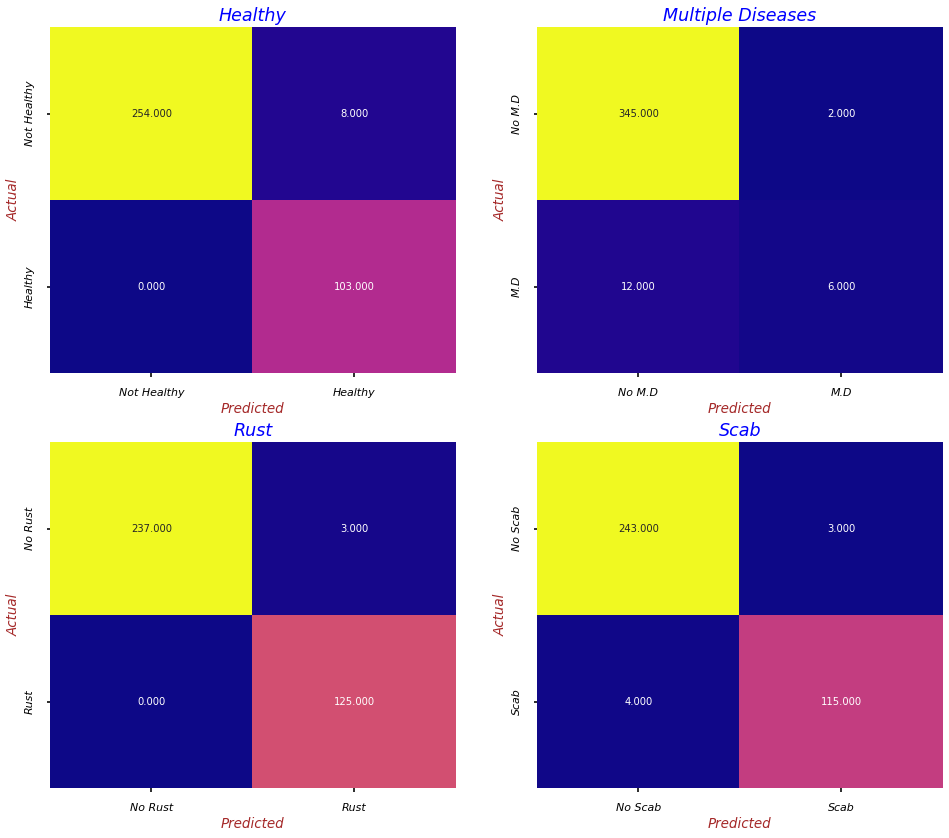


::::    TEST Set    ====>    FINAL Results    ::::



Healthy  Multiple_Diseases    Rust    Scab
BINARY Accuracy       0.9781             0.9699  0.9772  0.9781
Precision             0.9279             0.9160  0.9474  0.9562
Recall                1.0000             0.9008  0.9512  0.9562
Macro F1 Score        0.9736             0.7208  0.9909  0.9781
Macro ROC AUC Score   0.9847             0.6638  0.9938  0.9771

In [33]:
# Plotting the Results on TEST Set
print("\n::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_121_best_model_test_results = confusion_matrix_(y_test, X_test, loaded_model)

# Displaying the overall performance results
print("\n::::    TEST Set    ====>    FINAL Results    ::::\n")
display(densenet_121_best_model_test_results)

**`OBSERVATIONS`**

- On the TEST set model is working very well for the `Rusty`, `Scab` and `Healthy` images.
    - However, for the `Multiple diseases` class that has the lowest +ve cases, it is making some false positives and negatives.


- The improvement needs to be done for `Multiple Diseases` class.

### **`Explaining_Best_Model_Predictions`**

In [34]:
from tf_explain.core.grad_cam import GradCAM

In [35]:
# Instantiation of the explainer
explainer = GradCAM()

In [36]:
# Creating the output directory
output_dir = pathlib.Path(os.path.join(os.getcwd(), "output"))
os.mkdir(output_dir)

In [37]:
# Clearing the TF session
tf.keras.backend.clear_session()

In [38]:
# Checking the Multiple Diseases images
md_only_records = pd.DataFrame(y_test, columns=cols)

In [40]:
md_only_idx = list(md_only_records[md_only_records['Multiple_Diseases'] == 1].index)
md_only_idx

[2,
 9,
 68,
 88,
 90,
 142,
 185,
 188,
 210,
 211,
 217,
 222,
 256,
 291,
 298,
 360,
 361,
 364]

In [89]:
def explain_pred(X, y, img_idx, best_model, class_idx, exp=explainer):
  """
  """
  # Oputput file name
  output_name = "model_pred_{}.png".format(img_idx)
  
  # Invoking the explainer explain method
  output = exp.explain([X[img_idx:img_idx+1], y[img_idx]], model=best_model, class_index=class_idx)

  # Generating the prediction results
  pred_results = pd.DataFrame(np.round(best_model.predict_step(X[img_idx:img_idx+1]).numpy(),3), columns=cols)
  display(pred_results)
  print("\n")

  # Plotting the Prediction Explanation
  with plt.style.context('seaborn'):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), sharex=True, sharey=True)
        ax[0].imshow(X[img_idx,:,:,:], aspect='auto')
        ax[0].set_title("Original", fontdict= label_font_dict)
        ax[0].axis("off")
        ax[1].imshow(output, aspect='auto')
        ax[1].set_title("Which part of the image Model majorly focussed?", fontdict= label_font_dict)
        ax[1].axis("off")
        plt.show();
  
  # Saving the output
  exp.save(output, output_dir, output_name)

#### **Correct_Predictions**

Healthy  Multiple_Diseases   Rust   Scab
0    0.003              0.955  0.027  0.015

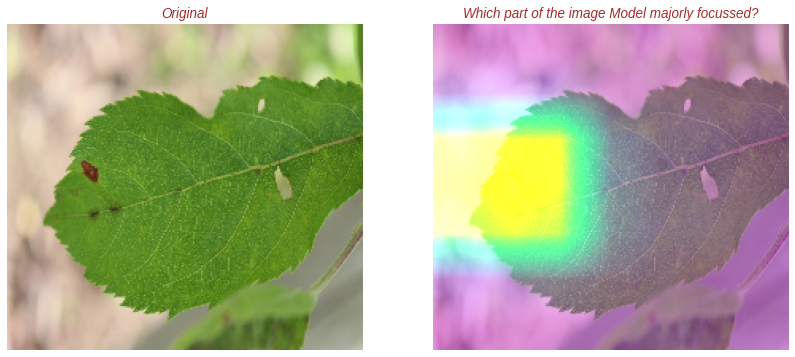

In [52]:
explain_pred(X_test, y_test, md_only_idx[1], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.002               0.84  0.156  0.003

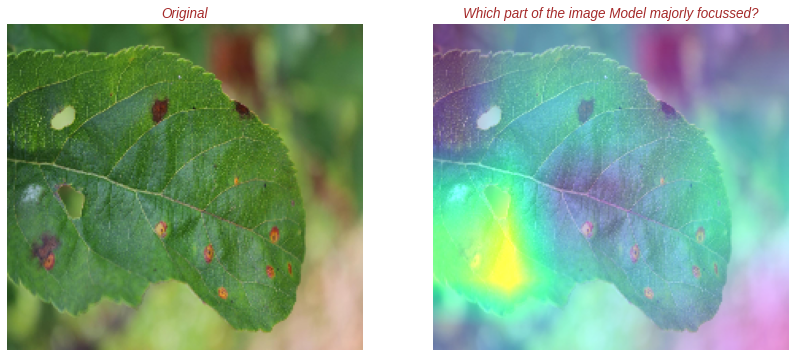

In [58]:
explain_pred(X_test, y_test, md_only_idx[7], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.121              0.466  0.321  0.092

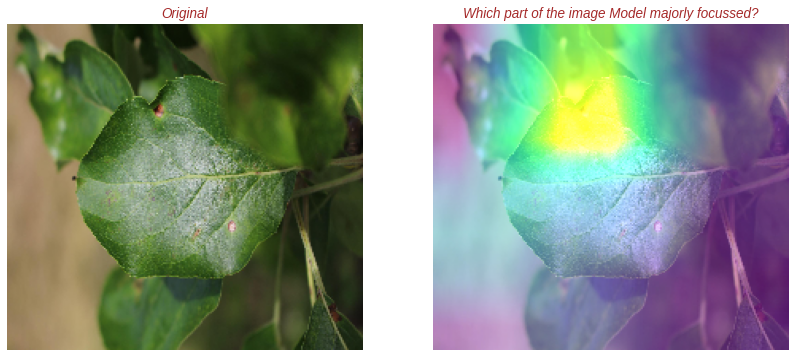

In [62]:
explain_pred(X_test, y_test, md_only_idx[8], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a moderate confidence. But, it feels like the model has some confusion with the `RUST` class.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases  Rust   Scab
0    0.021              0.848  0.04  0.091

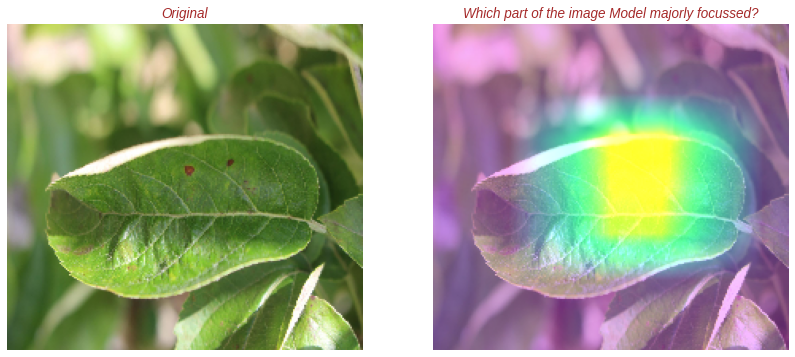

In [63]:
explain_pred(X_test, y_test, md_only_idx[9], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases  Rust  Scab
0      0.0              0.999   0.0   0.0

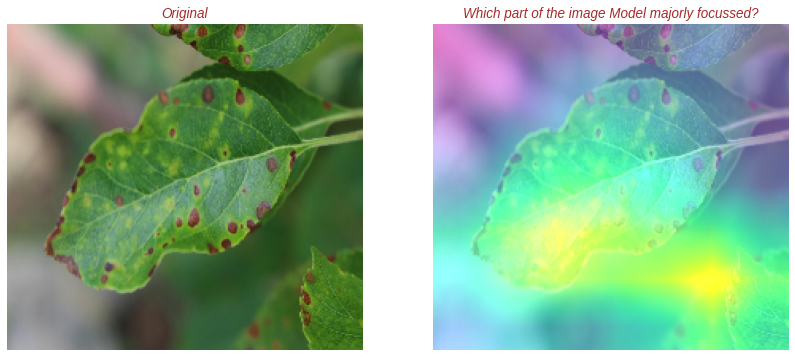

In [69]:
explain_pred(X_test, y_test, md_only_idx[15], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases  Rust   Scab
0    0.001              0.984  0.01  0.005

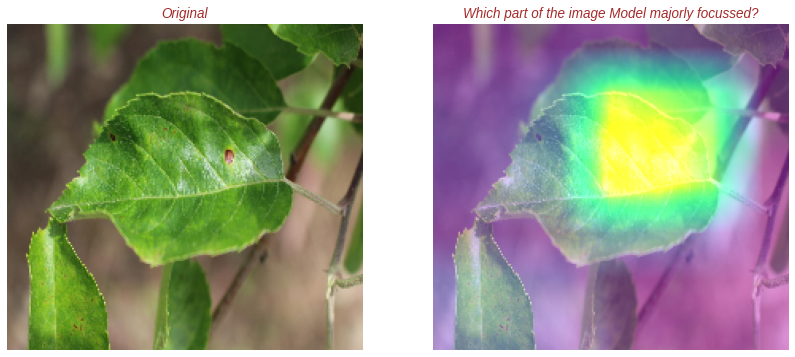

In [71]:
explain_pred(X_test, y_test, md_only_idx[17], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

#### **Some_Mistakes**

Healthy  Multiple_Diseases   Rust   Scab
0    0.727              0.083  0.042  0.148

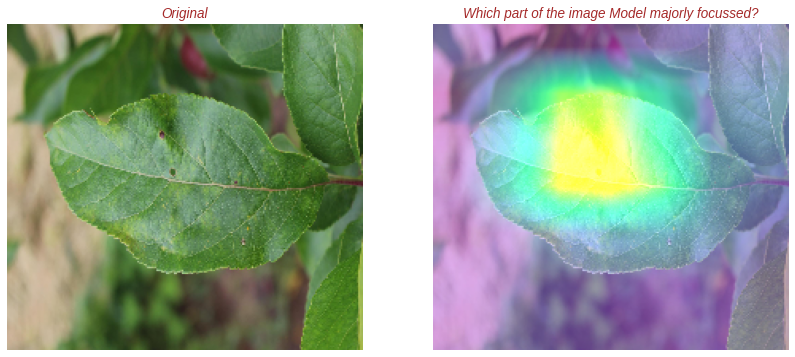

In [72]:
explain_pred(X_test, y_test, md_only_idx[0], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has gone completely wrong, although it has focussed on the correct area but unable to capture the features representing the disease.

Healthy  Multiple_Diseases   Rust  Scab
0      0.0              0.013  0.987   0.0

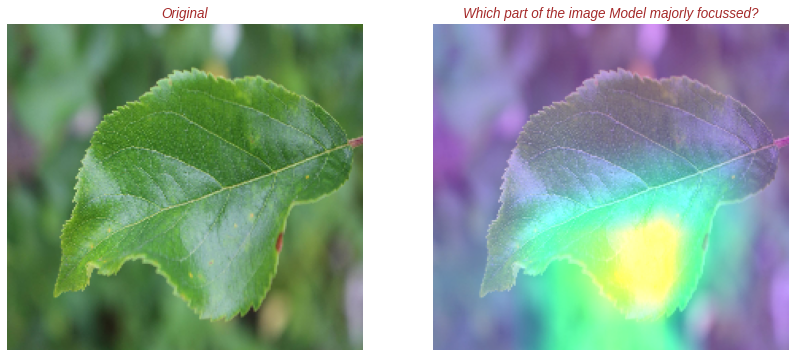

In [73]:
explain_pred(X_test, y_test, md_only_idx[3], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has gone wrong and it feels like it is getting confused with `RUST` class features, although it has focussed on the correct area but unable to capture the features representing the `Multiple Disease`.

Healthy  Multiple_Diseases  Rust  Scab
0      0.0                0.0   0.0   1.0

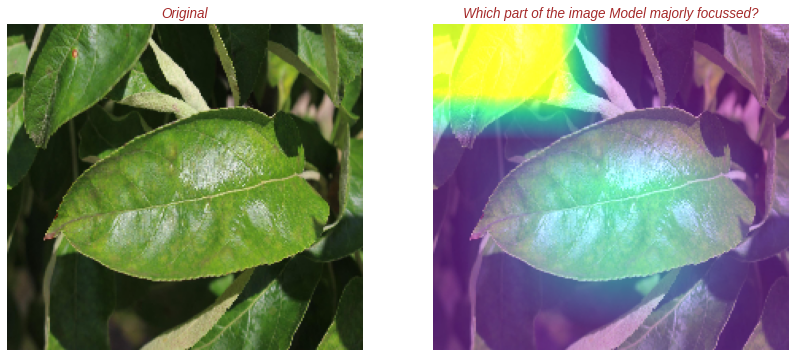

In [74]:
explain_pred(X_test, y_test, md_only_idx[14], loaded_model, 1);

**`OBSERVATIONS`**

- For the above image the model has gone wrong and it feels like it is getting confused with `SCAB` class features.
- Here, the model has captured the features from the leaf that is in the backgroud or not in main focus, although it has given some attention to the main leaf but unable to capture the features representing the `Multiple Disease`.

## **`Improvement_1`**
- DenseNet 121 + Focal Loss + Label Smoothing + Adam + 0.0005
    - Let's see how the best model is performing on the unseen dataset after this improvement & try to explain its predictions.

In [12]:
# loading Models' JSON and creating the Model
with open('DenseNet_Model.json', 'r') as model_json_file2:
    loaded_model_json2 = model_json_file2.read()
    
# Loading the model from json
loaded_model2 = model_from_json(loaded_model_json2)

# load weights into new model
loaded_model2.load_weights("/content/weights-09-0.0277.hdf5")

### **`Performance on UNSEEN TEST Set`**


::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::

12/12 [==============================] - 3s 93ms/step


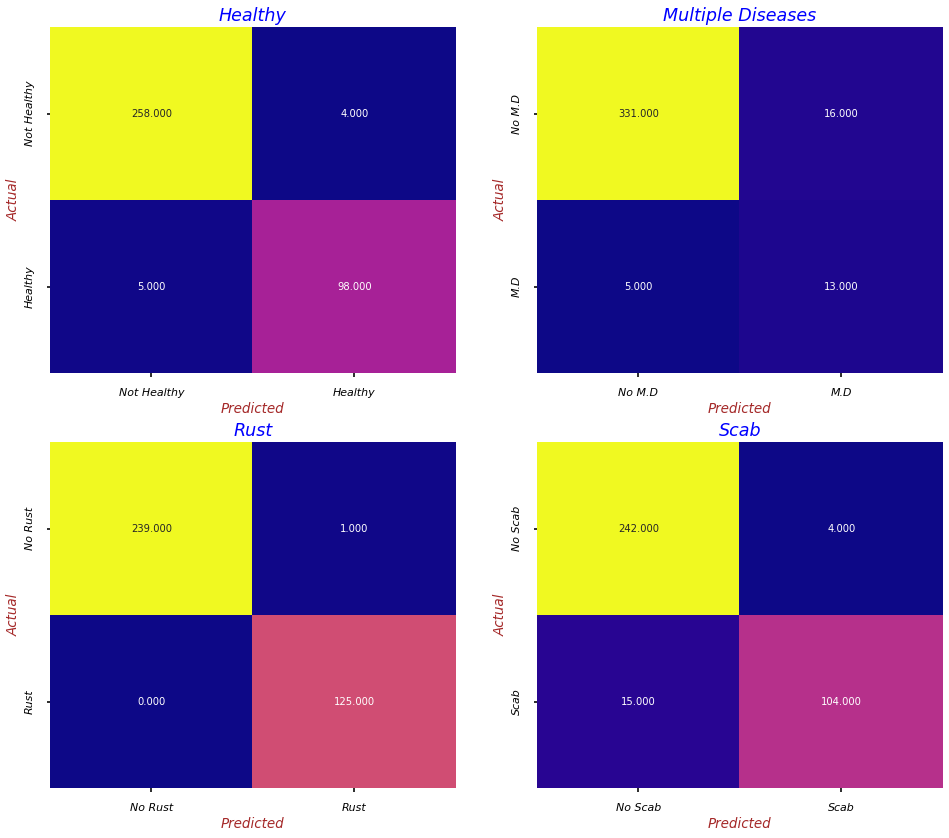


::::    TEST Set    ====>    FINAL Results    ::::



Healthy  Multiple_Diseases    Rust    Scab
BINARY Accuracy       0.9753             0.9589  0.9717  0.9658
Precision             0.9608             0.8473  0.9183  0.9315
Recall                0.9515             0.9174  0.9593  0.9315
Macro F1 Score        0.9695             0.7612  0.9970  0.9393
Macro ROC AUC Score   0.9681             0.8381  0.9979  0.9288

In [76]:
# Plotting the Results on TEST Set
print("\n::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_121_best_model_imp1_test_results = confusion_matrix_(y_test, X_test, loaded_model2)

# Displaying the overall performance results
print("\n::::    TEST Set    ====>    FINAL Results    ::::\n")
display(densenet_121_best_model_imp1_test_results)

**`OBSERVATIONS`**

- On the TEST set model is working very well for the `Rusty`, `Scab` and `Healthy` images.
    - However, for the `Multiple diseases` class that has the lowest +ve cases, it is making some false positives and negatives.


- By using the Focal Loss + Label Smoothing with above best model configuration has improved the results for `Multiple Diseases` class.

### **`Explaining_Best_Model_Predictions`**

In [77]:
from tf_explain.core.grad_cam import GradCAM

In [78]:
# Instantiation of the explainer
explainer2 = GradCAM()

#### **Correct_Predictions**

Healthy  Multiple_Diseases   Rust   Scab
0    0.027              0.675  0.157  0.141

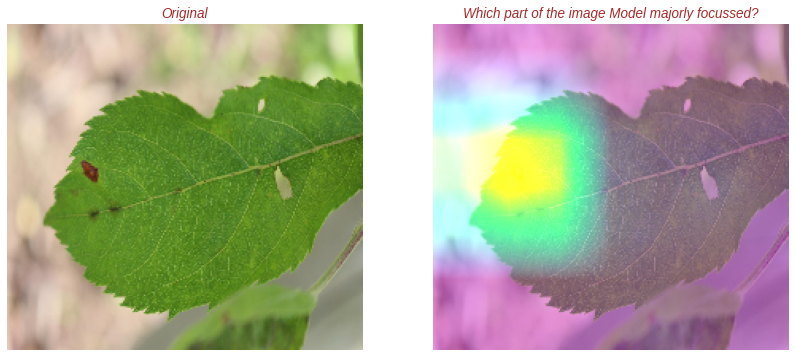

In [90]:
explain_pred(X_test, y_test, md_only_idx[1], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust  Scab
0      0.0              0.739  0.261   0.0

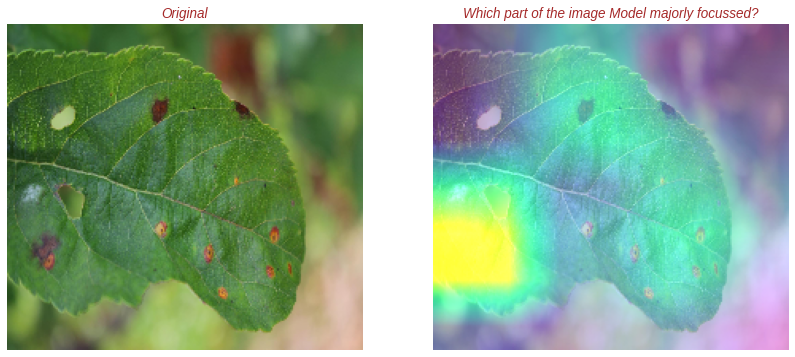

In [91]:
explain_pred(X_test, y_test, md_only_idx[7], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.001               0.82  0.169  0.011

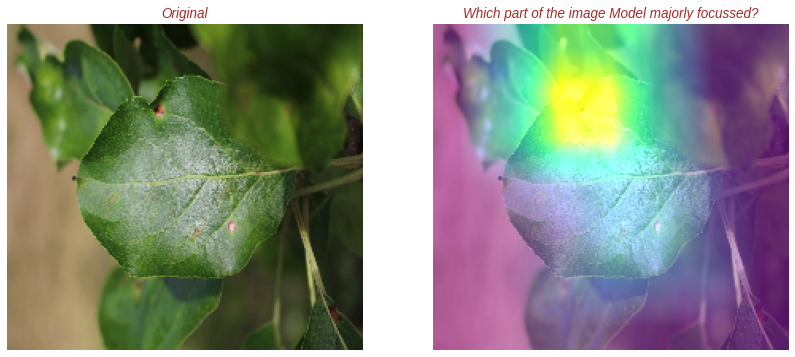

In [92]:
explain_pred(X_test, y_test, md_only_idx[8], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence `(better than the best model)`.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.001              0.892  0.065  0.042

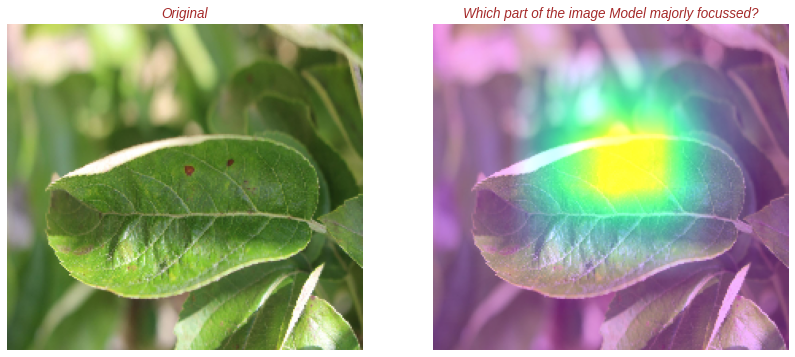

In [93]:
explain_pred(X_test, y_test, md_only_idx[9], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence `(better than the best model)`.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.001              0.889  0.079  0.031

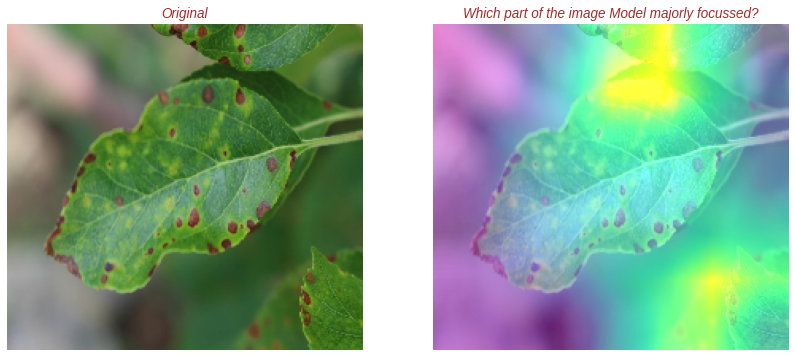

In [94]:
explain_pred(X_test, y_test, md_only_idx[15], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence `(better than the best model)`.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.011              0.747  0.158  0.083

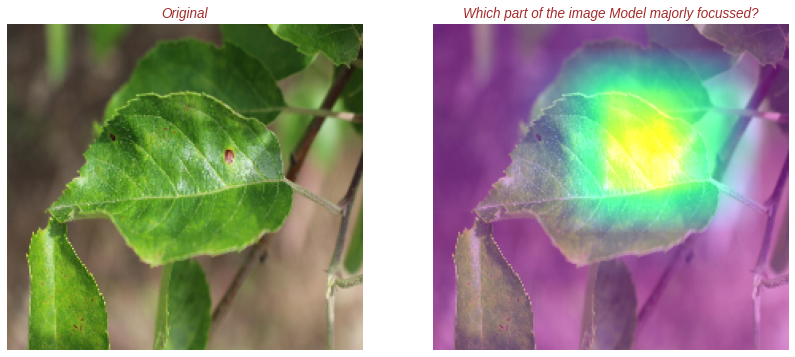

In [95]:
explain_pred(X_test, y_test, md_only_idx[17], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence `(better than the best model)`.
  - And, as we can see it has also focussed on the correct infected area of the image.

#### **`Mistakes_of_BestModel_corrected_after_Improvement`**

Healthy  Multiple_Diseases  Rust   Scab
0    0.018              0.704  0.17  0.108

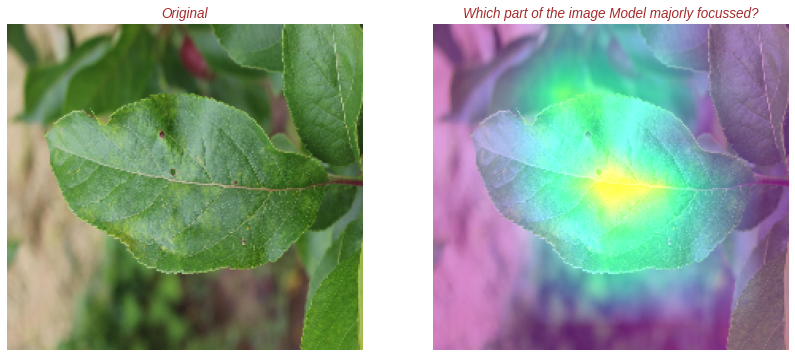

In [96]:
explain_pred(X_test, y_test, md_only_idx[0], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases   Rust   Scab
0    0.001              0.508  0.489  0.002

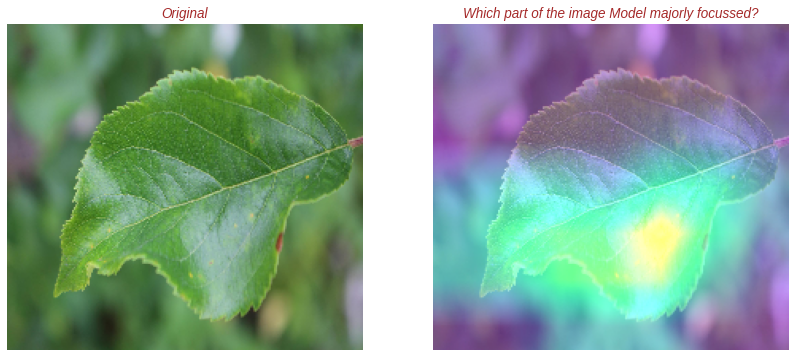

In [97]:
explain_pred(X_test, y_test, md_only_idx[3], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction but it looks like it gets confused with `RUST` class features, although it has focussed on the correct area but unable to capture the features representing the `Multiple Disease`.

Healthy  Multiple_Diseases   Rust   Scab
0    0.276              0.353  0.076  0.295

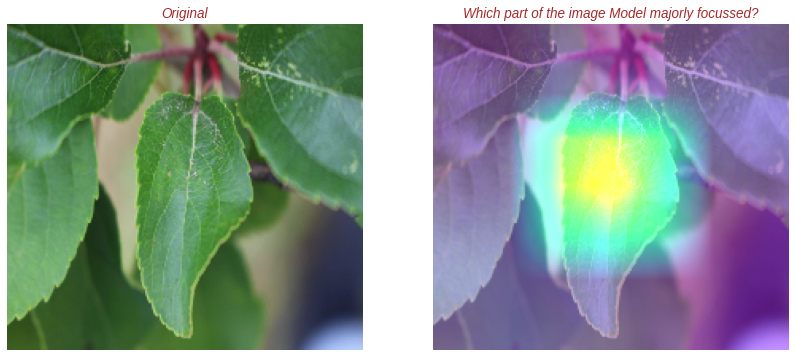

In [100]:
explain_pred(X_test, y_test, md_only_idx[13], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a slightly higher confidence as compared to the other classes. 
  - And, as we can see it has also focussed on the correct infected area of the image.

Healthy  Multiple_Diseases  Rust   Scab
0    0.027              0.653  0.09  0.231

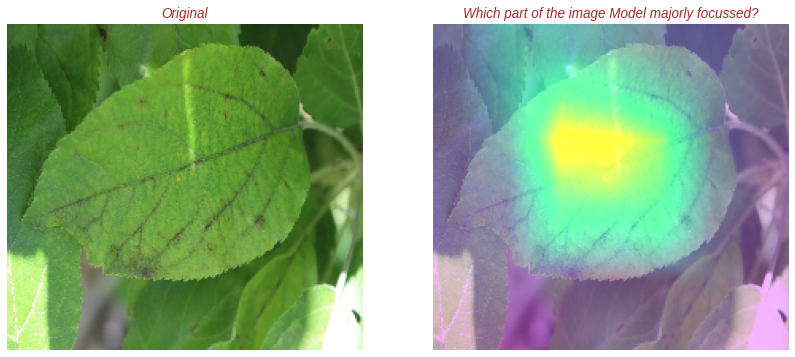

In [102]:
explain_pred(X_test, y_test, md_only_idx[10], loaded_model2, 1, explainer2);

**`OBSERVATIONS`**

- For the above image the model has given the correct prediction with a higher confidence.
  - And, as we can see it has also focussed on the correct infected area of the image.

## **`Improvement_2`**
- DenseNet 121 + Focal Loss + Label Smoothing + Adam + 0.0005 =====> DL CNN features then training XGBoost
    - Let's see whether the combination of DL CNN Model + XGBoost gives us the much required boost in the models' performance.

In [16]:
# Loading the required libraries
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

In [13]:
# Storing the DL Model with top layers excluded
new_model = tf.keras.models.Model(loaded_model2.input, 
                                  loaded_model2.get_layer('Flatten_for_hidden_layers').output)

In [14]:
# Generating the features for X_TRAIN
features_x_train = new_model.predict(X_train)

349/349 [==============================] - 881s 3s/step


In [15]:
# Shape of X_TRAIN features
features_x_train.shape

(11138, 1024)

In [18]:
# Generating the X_TRAIN features
features_x_test = new_model.predict(X_test)

12/12 [==============================] - 34s 3s/step


In [17]:
# Instantiating the Standard Scaler and training it
scaler = StandardScaler()
scaler.fit(features_x_train)

StandardScaler()

In [19]:
# Standardizing the X_TRAIN & X_TEST features
x_tr = scaler.transform(features_x_train)
x_te = scaler.transform(features_x_test)

In [ ]:
# Generating the TGT class labels for training & prediction
np.argmax(y_test, axis = 1)

array([2, 2, 1, 3, 3, 3, 2, 3, 2, 1, 3, 2, 3, 2, 2, 3, 3, 0, 0, 3, 2, 2,
       2, 3, 3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 0, 3, 0, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 3, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0,
       1, 3, 1, 3, 0, 3, 0, 2, 3, 0, 3, 3, 0, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 0, 3, 3,
       2, 2, 2, 3, 3, 3, 3, 0, 0, 0, 1, 2, 2, 2, 3, 0, 2, 0, 3, 3, 3, 0,
       3, 2, 2, 2, 0, 2, 2, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 3, 2, 0, 0, 2,
       2, 2, 2, 3, 3, 0, 2, 3, 2, 1, 3, 2, 1, 0, 0, 0, 0, 0, 3, 2, 2, 0,
       0, 2, 2, 3, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 3, 2,
       3, 2, 1, 0, 2, 0, 3, 0, 0, 2, 2, 3, 0, 3, 2, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 0, 0, 3, 3, 3, 2, 3, 0, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 2, 0, 3, 2, 2, 3, 3, 2, 2, 0,
       2, 2, 3, 3, 3, 1, 2, 0, 0, 3, 2, 3, 1, 0, 3,

In [46]:
# Fitting the XGBOOST model with no HPTuning
clf = xgb.XGBClassifier(max_depth = 16, n_estimators = 200)
clf.fit(x_tr, np.argmax(y_train, axis = 1))

XGBClassifier(max_depth=16, n_estimators=200, objective='multi:softprob')

In [47]:
# Generating the prediction on X_TEST
y_pred = clf.predict(x_te)

In [48]:
# Accuracy Score
xgboost_acc = accuracy_score(y_pred, np.argmax(y_test, axis = 1))
print(xgboost_acc)

0.9315068493150684


In [49]:
# Classification Performance report
print(classification_report(y_pred, np.argmax(y_test, axis = 1)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.56      0.48      0.51        21
           2       1.00      0.97      0.98       129
           3       0.89      0.96      0.93       110

    accuracy                           0.93       365
   macro avg       0.85      0.84      0.84       365
weighted avg       0.93      0.93      0.93       365



In [50]:
def generate_confusion_matrix(y_pred, y_test):
    """
    Description : This function is created for generating the confusion matrix results.
    """
    c = tf.math.confusion_matrix(y_pred, y_test)
    with plt.style.context('seaborn'):
      plt.figure(figsize=(12,10))
      sns.heatmap(c, annot=True, fmt=".4g")
      plt.yticks(ticks=[0,1,2,3],labels=['HL', 'MD', 'RUST', 'SCAB'], rotation=90)
      plt.xticks(ticks=[0,1,2,3],labels=['HL', 'MD', 'RUST', 'SCAB'])

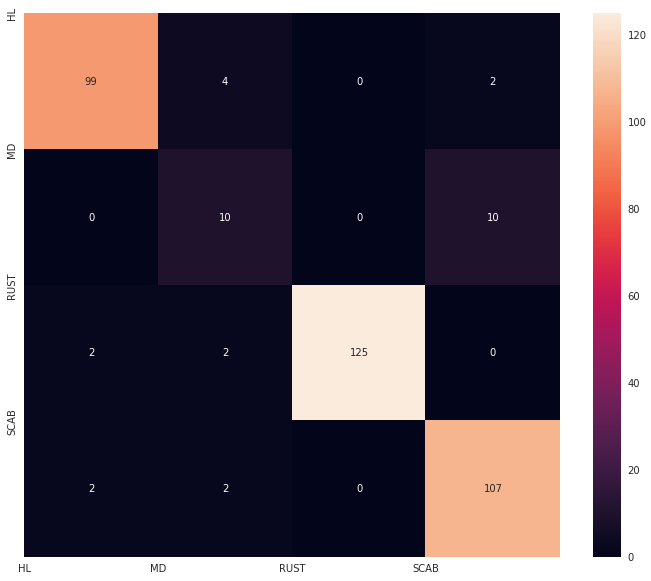

In [45]:
# Results on TEST Set
generate_confusion_matrix(y_pred, np.argmax(y_test, axis = 1))

**`OBSERVATIONS`**

- The above confusion matrix yields the results fairly similar to the Improvement-1
  - However, for the future work we can try different combinations of DL features + diff ML models.

## **`OVERALL_RESULTS`**
- In the analysis & experimentations that been carried out above, I found that:
    - Using Focal Loss + Label Smoothing along with best model configurations has given significant rise in the overall performance.
    - And, using the combination of DL features + ML models has yielded the results similar to Improvement - 1.
        - However, for future work, we can try to HP Tune the ML model or try different such combinations.